In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import ipywidgets as widgets
from highlight_text import fig_text
from ipywidgets import *
from scipy import stats
from mplsoccer import Radar, PyPizza, add_image, FontManager, grid

In [2]:
font_normal = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto%5Bwdth,wght%5D.ttf')
font_italic = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto-Italic%5Bwdth,wght%5D.ttf')
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
                        'RobotoSlab%5Bwght%5D.ttf')
URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

In [3]:
#read in the data
df = pd.read_csv('C:/Users/Nahim/Downloads/pl2022_2023.csv', encoding='latin-1')

In [4]:
df = df.drop(['Rk', 'Nation', 'Pos', 'Squad', 'Age', 'Born', 'Matches'],axis=1).reset_index()

In [5]:
df = df.rename(columns={'Gls': 'Goals', 'Sh':'Shots', 'SoT':'Shots on Target', 'FK':'Freekicks', 'Sh/90':'Shots Per 90', 
                        'G/Sh':'Goals Per Shots', 'G/SoT':'Goals Per SoT', 'Dist': 'Distribution', 'PK': 'Penalty Kicks',
                        'xG': 'Expected Goals', 'npxG': 'Non-Penalty\nExpected Goals', 'npxG/Sh': 'Non-Penalty\nExpected Goals\nPer Shot', 'G-xG': 'Goals Per\nExpected Goals', 'np:G-xG': 'Non-Penalty\nGoals Per\nExpected Goals',})

In [6]:
params = list(df.columns)
print(params)
params = params[2:]

['index', 'Player', '90s', 'Goals', 'Shots', 'Shots on Target', 'SoT%', 'Shots Per 90', 'SoT/90', 'Goals Per Shots', 'Goals Per SoT', 'Distribution', 'Freekicks', 'Penalty Kicks', 'PKatt', 'Expected Goals', 'Non-Penalty\nExpected Goals', 'Non-Penalty\nExpected Goals\nPer Shot', 'Goals Per\nExpected Goals', 'Non-Penalty\nGoals Per\nExpected Goals']


In [7]:
dropdown = widgets.Dropdown(
    options=df.Player.unique(),
    value='Erling Haaland',
    description='Player 1:'
)
dropdown

Dropdown(description='Player 1:', index=171, options=('Brenden Aaronson', 'Che Adams', 'Tyler Adams', 'Tosin A…

In [8]:
player_a = dropdown.value
player_b = "Mohamed Salah"

In [9]:
player_a

'Erling Haaland'

In [10]:
player = df.loc[df['Player']==player_a].reset_index()
player = list(player.loc[0])
player = player[3:]

player2 = df.loc[df['Player']==player_b].reset_index()
player2 = list(player2.loc[0])
player2 = player2[3:]

In [11]:
player

[8.3,
 15.0,
 38.0,
 20.0,
 52.6,
 4.55,
 2.4,
 0.37,
 0.7,
 10.9,
 0.0,
 1.0,
 1.0,
 9.0,
 8.2,
 0.22,
 6.0,
 5.8]

In [12]:
print(len(params),len(player))

18 18


In [13]:
values = []
for x in range(len(params)):
    values.append(math.floor(stats.percentileofscore(df[params[x]],player[x])))
    
values2 = []
for x in range(len(params)):
    values2.append(math.floor(stats.percentileofscore(df[params[x]],player2[x])))

In [14]:
values

[88, 99, 99, 99, 62, 96, 98, 69, 45, 12, 45, 98, 97, 99, 99, 70, 99, 99]

In [15]:
params_offset = []
for x in range(len(params)):
    if(abs(values[x]-values2[x]) > 7):
        params_offset.append(False)
    else:
        params_offset.append(True)

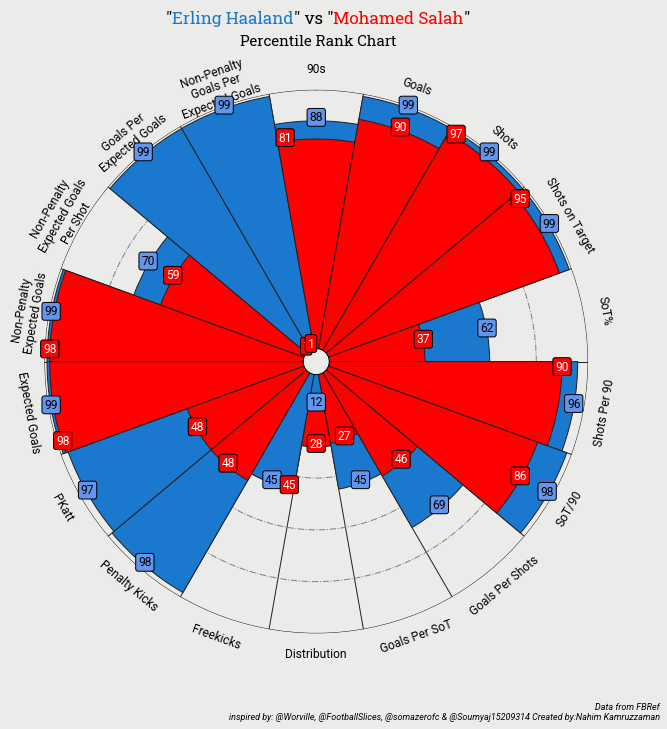

In [16]:
# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#222222",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    last_circle_color="#222222",    # color of last circle
    other_circle_ls="-.",           # linestyle for other circles
    other_circle_lw=1               # linewidth for other circles
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                     # list of values
    compare_values=values2,    # comparison values
    figsize=(10, 10),             # adjust figsize according to your need
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#222222",
        zorder=2, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_compare=dict(
        facecolor="#FF0000", edgecolor="#222222",
        zorder=2, linewidth=1,
    ),
    kwargs_params=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, va="center",
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    ),                          # values to be used when adding parameter-values labels
    kwargs_compare_values=dict(
        color="#FFFFFF", fontsize=12, fontproperties=font_normal.prop, zorder=3,
        bbox=dict(edgecolor="#000000", facecolor="#FF0000", boxstyle="round,pad=0.2", lw=1)
    ),                          # values to be used when adding parameter-values labels
)


# adjust text for comparison-values-text
baker.adjust_texts(params_offset, offset=-0.14, adj_comp_values=True)

# add title
fig_text(
    0.515, 0.99, f'"<{player_a}>" vs "<{player_b}>"', size=17, fig=fig,
    highlight_textprops=[{"color": '#1A78CF'}, {"color": '#FF0000'}],
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Percentile Rank Chart",
    size=15,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add credits
CREDIT_1 = "Data from FBRef"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314 Created by:Nahim Kamruzzaman"

fig.text(
    0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=font_italic.prop, color="#000000",
    ha="right"
)

plt.show()

In [17]:
low = []
high = []


for x in params:
    a = min(df[params][x])
    a = a - (a*0.25)
    
    b = max(df[params][x])
    b = b + (b*0.25)
    
    low.append(a)
    high.append(b)
    

In [18]:
radar = Radar(params, low, high,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(params),
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

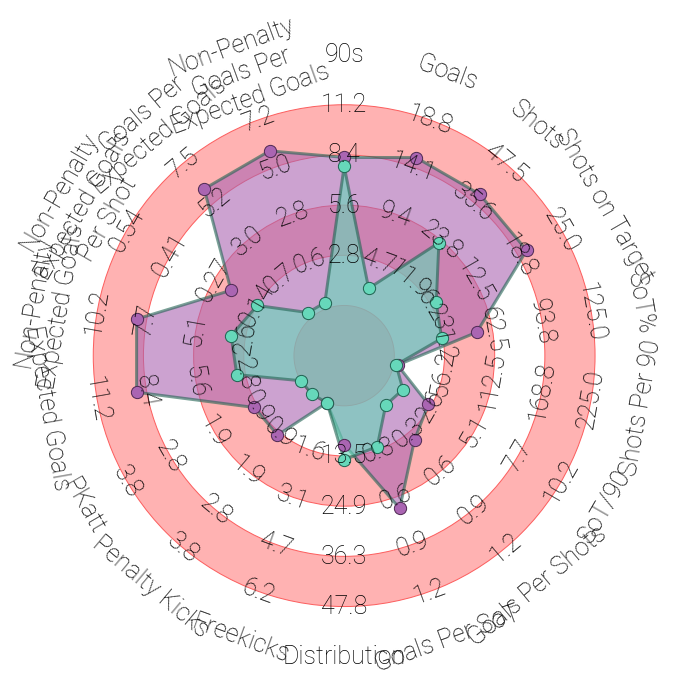

In [19]:
# plot radar
fig, ax = radar.setup_axis()
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')

radar1, vertices1 = radar.draw_radar_solid(player, ax=ax,
                                           kwargs={'facecolor': '#aa65b2',
                                                   'alpha': 0.6,
                                                   'edgecolor': '#216352',
                                                   'lw': 3})

radar2, vertices2 = radar.draw_radar_solid(player2, ax=ax,
                                           kwargs={'facecolor': '#66d8ba',
                                                   'alpha': 0.6,
                                                   'edgecolor': '#216352',
                                                   'lw': 3})

ax.scatter(vertices1[:, 0], vertices1[:, 1],
           c='#aa65b2', edgecolors='#502a54', marker='o', s=150, zorder=2)
ax.scatter(vertices2[:, 0], vertices2[:, 1],
           c='#66d8ba', edgecolors='#216352', marker='o', s=150, zorder=2)

range_labels = radar.draw_range_labels(ax=ax, fontsize=25, fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=ax, fontsize=25, fontproperties=robotto_thin.prop)

In [ ]:
# 